<a href="https://colab.research.google.com/github/saurabhgssingh/ANZ-Virtual-Internship/blob/master/movies_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import plotly.express as py

In [ ]:
movies=pd.read_csv("/content/drive/My Drive/Incubator/movies.csv")
movies.head()

,id,title,tagline,description,genres,keywords,date,collection,runtime,revenue,budget,director,cast,production_companies,production_countries,popularity,average_vote,num_votes,language,imdb_id,poster_url
0,862,Toy Story,NaN,"Led by Woody, Andy's toys live happily in his ...","animation, comedy, family","jealousy, toy, boy, friendship, friends, rival...",1995-10-30,Toy Story Collection,81.0,373554033.0,30000000,John Lasseter,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...",Pixar Animation Studios,United States of America,21.946943,7.7,5415.0,en,tt0114709,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg
1,8844,Jumanji,Roll the dice and unleash the excitement!,When siblings Judy and Peter discover an encha...,"adventure, fantasy, family","board game, disappearance, based on children's...",1995-12-15,NaN,104.0,262797249.0,65000000,Joe Johnston,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...","TriStar Pictures, Teitler Film, Interscope Com...",United States of America,17.015539,6.9,2413.0,en,tt0113497,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,A family wedding reignites the ancient feud be...,"romance, comedy","fishing, best friend, duringcreditsstinger, ol...",1995-12-22,Grumpy Old Men Collection,101.0,0.0,0,Howard Deutch,"Walter Matthau, Jack Lemmon, Ann-Margret, Soph...","Warner Bros., Lancaster Gate",United States of America,11.712900,6.5,92.0,en,tt0113228,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg
3,31357,Waiting to Exhale,Friends are the people who let you be yourself...,"Cheated on, mistreated and stepped on, the wom...","comedy, drama, romance","based on novel, interracial relationship, sing...",1995-12-22,NaN,127.0,81452156.0,16000000,Forest Whitaker,"Whitney Houston, Angela Bassett, Loretta Devin...",Twentieth Century Fox Film Corporation,United States of America,3.859495,6.1,34.0,en,tt0114885,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg
4,11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,Just when George Banks has recovered from his ...,comedy,"baby, midlife crisis, confidence, aging, daugh...",1995-02-10,Father of the Bride Collection,106.0,76578911.0,0,Charles Shyer,"Steve Martin, Diane Keaton, Martin Short, Kimb...","Sandollar Productions, Touchstone Pictures",United States of America,8.387519,5.7,173.0,en,tt0113041,/e64sOI48hQXyru7naBFyssKFxVd.jpg


In [ ]:
movies.isna().sum()

id                          0
title                       4
tagline                 25845
description               995
genres                   2524
keywords                14889
date                       88
collection              42054
runtime                   268
revenue                     4
budget                      0
director                  917
cast                     2491
production_companies    12282
production_countries     6496
popularity                  4
average_vote                4
num_votes                   4
language                   11
imdb_id                    17
poster_url                399
dtype: int64

In [ ]:
movies.head()

,id,title,tagline,description,genres,keywords,date,collection,runtime,revenue,budget,director,cast,production_companies,production_countries,popularity,average_vote,num_votes,language,imdb_id,poster_url
0,862,Toy Story,NaN,"Led by Woody, Andy's toys live happily in his ...","animation, comedy, family","jealousy, toy, boy, friendship, friends, rival...",1995-10-30,Toy Story Collection,81.0,373554033.0,30000000,John Lasseter,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...",Pixar Animation Studios,United States of America,21.946943,7.7,5415.0,en,tt0114709,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg
1,8844,Jumanji,Roll the dice and unleash the excitement!,When siblings Judy and Peter discover an encha...,"adventure, fantasy, family","board game, disappearance, based on children's...",1995-12-15,NaN,104.0,262797249.0,65000000,Joe Johnston,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...","TriStar Pictures, Teitler Film, Interscope Com...",United States of America,17.015539,6.9,2413.0,en,tt0113497,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,A family wedding reignites the ancient feud be...,"romance, comedy","fishing, best friend, duringcreditsstinger, ol...",1995-12-22,Grumpy Old Men Collection,101.0,0.0,0,Howard Deutch,"Walter Matthau, Jack Lemmon, Ann-Margret, Soph...","Warner Bros., Lancaster Gate",United States of America,11.712900,6.5,92.0,en,tt0113228,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg
3,31357,Waiting to Exhale,Friends are the people who let you be yourself...,"Cheated on, mistreated and stepped on, the wom...","comedy, drama, romance","based on novel, interracial relationship, sing...",1995-12-22,NaN,127.0,81452156.0,16000000,Forest Whitaker,"Whitney Houston, Angela Bassett, Loretta Devin...",Twentieth Century Fox Film Corporation,United States of America,3.859495,6.1,34.0,en,tt0114885,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg
4,11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,Just when George Banks has recovered from his ...,comedy,"baby, midlife crisis, confidence, aging, daugh...",1995-02-10,Father of the Bride Collection,106.0,76578911.0,0,Charles Shyer,"Steve Martin, Diane Keaton, Martin Short, Kimb...","Sandollar Productions, Touchstone Pictures",United States of America,8.387519,5.7,173.0,en,tt0113041,/e64sOI48hQXyru7naBFyssKFxVd.jpg


In [ ]:
movies['year']=pd.DatetimeIndex(movies['date']).year

# Most profitable production Houses

In [ ]:
movies['profit']=(movies['revenue']-movies['budget'])/10**9

In [ ]:
top_10_production_profit = movies.groupby('production_companies')['profit'].sum().sort_values(ascending=False)[:10]

Text(0.5, 1.0, 'Top 10 Production Houses with highest profits')

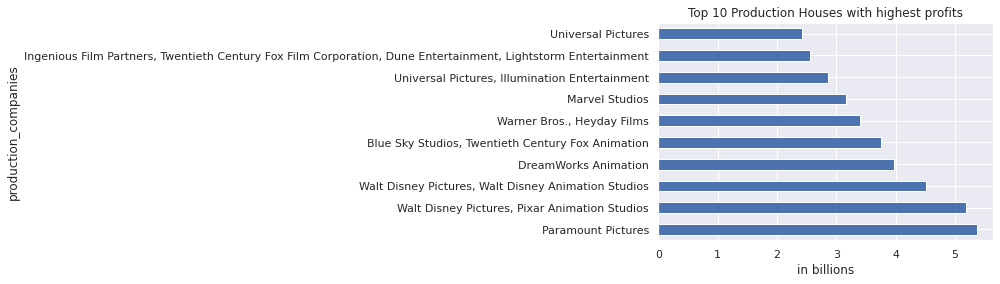

In [ ]:
plt.figure()
top_10_production_profit.plot(kind='barh')
plt.xlabel("in billions")
plt.title("Top 10 Production Houses with highest profits")

In [ ]:
after_2000=movies[movies["year"]>2000]
after_2000['runtime'].mean()

94.17895928550463



---



---



# The 10 most popular Directors.

Average popularity = total popularity / # of movies directed

In [ ]:
directors=pd.DataFrame(movies.groupby(by='director')['popularity'].sum().sort_values(ascending=False))
movies_by_directors=pd.DataFrame(movies['director'].value_counts())
movies_popularity=pd.merge(directors,movies_by_directors,how='inner',left_index=True,right_index=True)
movies_popularity['popularity_average']=movies_popularity['popularity']/movies_popularity['director']
movies_popularity.reset_index(inplace=True)
movies_popularity.drop(labels=['popularity','director'],axis=1,inplace=True)
print("Top 10 directors with high popularity averages(total popularity/number of movies)")
movies_popularity.sort_values('popularity_average',ascending=False,)[:10]

Top 10 directors with high popularity averages(total popularity/number of movies)


,index,popularity_average
35,Tim Miller,187.860492
10,Patty Jenkins,150.763031
0,Kyle Balda,120.485962
20,Chad Stahelski,116.558939
21,Chris Williams,114.715411
16,James Gunn,64.326807
119,Wes Ball,59.081829
17,Matt Reeves,50.741734
14,Edgar Wright,46.802535
42,Anthony Russo,44.050465




---



---



Movies released per month.

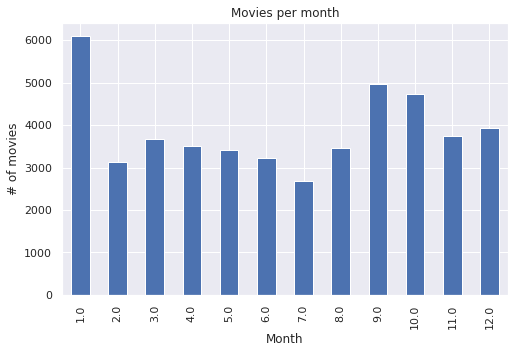

In [ ]:
movies['month']=pd.DatetimeIndex(movies['date']).month
plt.figure(figsize=(8,5))
movies['month'].value_counts().sort_index().plot(kind="bar")
plt.xlabel("Month")
plt.ylabel('# of movies')
plt.title('Movies per month')
plt.show()


From the plot we can observe that more movies are produced from September to January. January being the month for the most number of movies.
The release of movies is less in the period between February to August



---



---



---



## Movie runtime based on genre

In [ ]:
all_genres = [s.split(", ") for s in movies[movies.genres.notnull()].genres]
genres = [item for l in all_genres for item in l ]
movies['genres']=movies.genres.str.split(",")
 movies['genres'].replace([np.nan],[' '],inplace=True)
L=[]
#for i in range(len( movies['best_genre'])):
for i, genre in enumerate(movies.genres):
         L.append(genre[0])
  movies['best_genres']=L
genrewise=pd.merge(pd.DataFrame(movies['best_genres'].value_counts()),pd.DataFrame(movies.groupby('best_genres').sum()['popularity']),how='inner',left_index=True,right_index=True)
genrewise.columns=['num_movies','popularity_sum']
genrewise["average_popularity"]=genrewise['popularity_sum']/genrewise['num_movies']
runtime_genre = movies.groupby('best_genres').mean()['runtime'][1:]
runtime_genre=runtime_genre

Text(18, 101, '100 min')

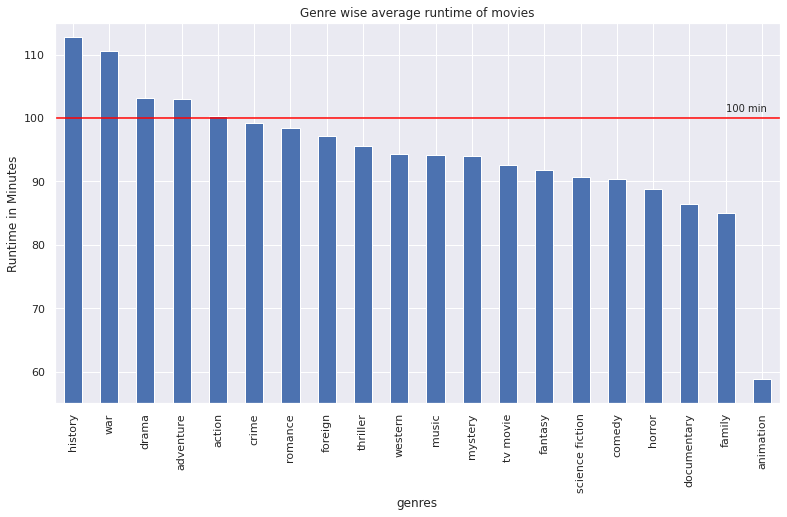

In [ ]:
plt.figure(figsize=(13,7))
runtime_genre.sort_values(ascending=False).plot(kind='bar')
plt.gca().set_ylim([55,115])
plt.xlabel('genres')
plt.ylabel('Runtime in Minutes')
plt.title('Genre wise average runtime of movies')
plt.axhline(100,color="red")
plt.annotate( "100 min",(18,101))

It can be clearly observed that movies from history, drama and adventure had average runtime higher than 100 minutes. While movies in animation genre had the smallest runtime.